In [285]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# train test split
from sklearn.model_selection import train_test_split

# impute missing values
from sklearn.impute import SimpleImputer # mean, median, most_frequent (mode), constant
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer # regresi
from sklearn.impute import KNNImputer # regresi KKN

# encoding
from sklearn.preprocessing import OneHotEncoder
from category_encoders import OrdinalEncoder, BinaryEncoder
from sklearn.preprocessing import KBinsDiscretizer

# scaling
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler 

# column transformer & pipeline
from sklearn.compose import ColumnTransformer, TransformedTargetRegressor
# from sklearn.pipeline import Pipeline

# polynomial feature
from sklearn.preprocessing import PolynomialFeatures

# Imbalance Handling
from imblearn.pipeline import Pipeline

# cross validation
from sklearn.model_selection import cross_val_score

# algorithm
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression, SGDRegressor, RidgeCV
from sklearn.svm import SVR, LinearSVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor 
from sklearn.ensemble import BaggingRegressor, AdaBoostRegressor, VotingRegressor 
from sklearn.neural_network import MLPRegressor
from xgboost.sklearn import XGBRegressor

# metric
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score 
from sklearn.metrics import f1_score, make_scorer, fbeta_score
from sklearn.metrics import precision_recall_curve, roc_curve, PrecisionRecallDisplay, auc
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# hyperparameter tuning
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, KFold


# **Capstone Project : <u>California Housing Price 1990</u>**

<img src='capstone-m3-coverphoto-min.png'>

| **Feature**         | **Description**                                          |
|---------------------|----------------------------------------------------------|
| `Longitude`         | Geographic coordinates of the house.                     |
| `Latitude`          | Geographic coordinates of the house.                     |
| `HousingMedianAge`  | Median age of houses in the neighborhood.                 |
| `TotalRooms`        | Total number of rooms in the house.                      |
| `TotalBedrooms`     | Total number of bedrooms in the house.                   |
| `Population`        | Population of the neighborhood.                          |
| `Households`        | Number of households in the neighborhood.               |
| `MedianIncome`      | Median income of households in the neighborhood.         |
| `MedianHouseValue`  | Median value of houses in the neighborhood.              |
| `OceanProximity`    | Proximity of the house to the ocean.                      |


#### **Context**:

In today's competitive housing market, accurately predicting house prices is crucial for both buyers and sellers. Accurately forecasting house values empowers buyers with informed financial decisions while helping sellers optimize their profit margins. This is where predictive modeling comes in, and one relevant domain is the California housing market, where diverse factors influence property values.

#### **Problem Statement**:

The primary challenge lies in developing a robust and accurate model that predicts median house values in California, considering the multitude of factors impacting housing prices. These factors encompass geographical attributes like latitude and longitude, demographic features like population and households, and housing-specific characteristics like total rooms, bedrooms, and age. The goal is to build a model that can capture these diverse influences and reliably predict median house values in different Californian localities.

#### **Goals**:

**Accurate Median House Value Prediction:**

- Develop a robust model that predicts median house values in California with high accuracy, achieving low Mean Absolute Error (MAE), Mean Squared Error (MSE), and Median Absolute Percentage Error (MAPE).
- Ensure the model generalizes well to unseen data across diverse Californian localities, capturing the influence of geographical, demographic, and housing-specific features.

#### **Metric Evaluation**:

1. Mean Absolute Error (MAE): Measures the average absolute difference between predicted and actual house values. A lower MAE indicates better model performance.

2. Mean Squared Error (MSE): Measures the average squared difference between predicted and actual house values. A lower MSE indicates better model fit.

3. Median Absolute Percentage Error (MAPE): Measures the median percentage difference between predicted and actual house values as a percentage of the actual values. A lower MAPE indicates better model accuracy relative to the actual house values.

___

## **1. Load Dataset**

In [286]:
# pd.set_option('display.max_colwidth', None)
df = pd.read_csv('data_california_house.csv')
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-119.79,36.73,52.0,112.0,28.0,193.0,40.0,1.9750,INLAND,47500.0
1,-122.21,37.77,43.0,1017.0,328.0,836.0,277.0,2.2604,NEAR BAY,100000.0
2,-118.04,33.87,17.0,2358.0,396.0,1387.0,364.0,6.2990,<1H OCEAN,285800.0
3,-118.28,34.06,17.0,2518.0,1196.0,3051.0,1000.0,1.7199,<1H OCEAN,175000.0
4,-119.81,36.73,50.0,772.0,194.0,606.0,167.0,2.2206,INLAND,59200.0
...,...,...,...,...,...,...,...,...,...,...
14443,-121.26,38.27,20.0,1314.0,229.0,712.0,219.0,4.4125,INLAND,144600.0
14444,-120.89,37.48,27.0,1118.0,195.0,647.0,209.0,2.9135,INLAND,159400.0
14445,-121.90,36.58,31.0,1431.0,NaN,704.0,393.0,3.1977,NEAR OCEAN,289300.0
14446,-117.93,33.62,34.0,2125.0,498.0,1052.0,468.0,5.6315,<1H OCEAN,484600.0


<hr>

## **Data Understanding and Cleaning**

## **Data Understanding**

In [287]:
print(f'The number of \033[4m\033[1mrows\033[0m and \033[4m\033[1mcolumns\033[0m in the df dataset is \033[1m\033[4m{df.shape}\033[0m')
df.info()

The number of rows and columns in the df dataset is (14448, 10)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14448 entries, 0 to 14447
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           14448 non-null  float64
 1   latitude            14448 non-null  float64
 2   housing_median_age  14448 non-null  float64
 3   total_rooms         14448 non-null  float64
 4   total_bedrooms      14311 non-null  float64
 5   population          14448 non-null  float64
 6   households          14448 non-null  float64
 7   median_income       14448 non-null  float64
 8   ocean_proximity     14448 non-null  object 
 9   median_house_value  14448 non-null  float64
dtypes: float64(9), object(1)
memory usage: 1.1+ MB


In [288]:
display(df.describe(), df.describe(include='object'))

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,14448.000000,14448.000000,14448.000000,14448.000000,14311.000000,14448.000000,14448.000000,14448.000000,14448.000000
mean,-119.566647,35.630093,28.618702,2640.132683,538.260709,1425.157323,499.508929,3.866667,206824.624516
std,2.006587,2.140121,12.596694,2191.612441,423.577544,1149.580157,383.098390,1.891158,115365.476182
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1451.000000,295.000000,784.000000,279.000000,2.570600,119600.000000
50%,-118.490000,34.260000,29.000000,2125.000000,435.000000,1165.000000,410.000000,3.539100,180000.000000
75%,-118.000000,37.710000,37.000000,3148.000000,647.000000,1724.000000,604.000000,4.736100,263900.000000
max,-114.310000,41.950000,52.000000,32627.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


,ocean_proximity
count,14448
unique,5
top,<1H OCEAN
freq,6369


In [289]:
pd.set_option('display.max_colwidth', None)

listItem = []
for col in df.columns:
    unique_values = df[col].dropna().unique().tolist()[:30]  # Retrieve up to 30 unique samples
    if len(unique_values) == 30:
        unique_values[-1] = str(unique_values[-1]) + ",..."  
    listItem.append([col, df[col].nunique(), unique_values])

table1Desc = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'],
                           data=listItem)

table1Desc

,Column Name,Number of Unique,Unique Sample
0,longitude,806,"[-119.79, -122.21, -118.04, -118.28, -119.81, -117.79, -117.8, -121.26, -117.65, -122.27, -121.94, -121.9, -118.15, -117.5, -121.33, -115.99, -117.09, -118.14, -120.9, -121.51, -117.32, -117.34, -121.53, -118.27, -120.84, -120.38, -118.2, -121.52, -121.09, -117.54,...]"
1,latitude,836,"[36.73, 37.77, 33.87, 34.06, 33.8, 33.81, 38.69, 33.48, 37.97, 37.28, 37.44, 34.05, 33.96, 38.64, 33.4, 32.68, 34.7, 38.2, 38.5, 34.14, 34.13, 38.61, 34.08, 38.77, 36.76, 33.93, 38.57, 38.68, 33.82, 37.98,...]"
2,housing_median_age,52,"[52.0, 43.0, 17.0, 50.0, 11.0, 14.0, 6.0, 10.0, 18.0, 4.0, 31.0, 12.0, 27.0, 15.0, 20.0, 16.0, 25.0, 32.0, 29.0, 5.0, 38.0, 41.0, 9.0, 33.0, 24.0, 42.0, 44.0, 21.0, 35.0, 34.0,...]"
3,total_rooms,5227,"[112.0, 1017.0, 2358.0, 2518.0, 772.0, 10535.0, 1206.0, 3917.0, 1638.0, 15259.0, 4356.0, 1646.0, 3362.0, 7923.0, 2203.0, 1945.0, 2569.0, 1984.0, 3120.0, 4719.0, 1691.0, 331.0, 8149.0, 2265.0, 1013.0, 932.0, 857.0, 2360.0, 5218.0, 202.0,...]"
4,total_bedrooms,1748,"[28.0, 328.0, 396.0, 1196.0, 194.0, 1620.0, 142.0, 638.0, 188.0, 2275.0, 1334.0, 408.0, 799.0, 1470.0, 493.0, 536.0, 737.0, 614.0, 641.0, 745.0, 353.0, 85.0, 1913.0, 801.0, 244.0, 201.0, 471.0, 711.0, 29.0, 424.0,...]"
5,population,3498,"[193.0, 836.0, 1387.0, 3051.0, 606.0, 4409.0, 572.0, 1809.0, 7266.0, 1968.0, 853.0, 1939.0, 4861.0, 1158.0, 515.0, 2341.0, 1071.0, 1319.0, 1857.0, 1457.0, 341.0, 2933.0, 2899.0, 410.0, 1043.0, 934.0, 1041.0, 1949.0, 75.0, 1129.0,...]"
6,households,1649,"[40.0, 277.0, 364.0, 1000.0, 167.0, 1622.0, 149.0, 564.0, 174.0, 2338.0, 1245.0, 410.0, 754.0, 1385.0, 492.0, 273.0, 705.0, 574.0, 526.0, 739.0, 329.0, 107.0, 1616.0, 792.0, 158.0, 243.0, 227.0, 452.0, 659.0, 28.0,...]"
7,median_income,9797,"[1.975, 2.2604, 6.299, 1.7199, 2.2206, 6.67, 8.847, 5.2586, 13.0502, 6.0666, 3.6294, 5.0821, 3.5089, 4.2985, 2.4342, 2.0109, 2.0114, 1.2532, 2.0472, 5.0371, 1.8438, 0.7069, 3.6788, 2.5521, 4.825, 1.4038, 2.6339, 2.89, 4.7083, 4.125,...]"
8,ocean_proximity,5,"[INLAND, NEAR BAY, <1H OCEAN, NEAR OCEAN, ISLAND]"
9,median_house_value,3548,"[47500.0, 100000.0, 285800.0, 175000.0, 59200.0, 283200.0, 388700.0, 137000.0, 500001.0, 272400.0, 240000.0, 265500.0, 305800.0, 139200.0, 119500.0, 54300.0, 104900.0, 102100.0, 93200.0, 180200.0, 66600.0, 70300.0, 178800.0, 157500.0, 184600.0, 145700.0, 86200.0, 213300.0, 216700.0, 176500.0,...]"


## **Data Understanding**

#### **Checking Duplicates**

In [290]:
df.duplicated().sum()

0

#### **Checking Whitespace**

In [291]:
# Import library re
import re

# Definisikan fungsi untuk mendeteksi spasi berlebih
def check_excessive_whitespace(value):
    if isinstance(value, str):
        return bool(re.search(r'\s{2,}', value))  # Mendeteksi 2 spasi atau lebih
    return False

# Proses deteksi spasi berlebih dan tampilkan informasi
whitespace_info = []
for column in df.columns:
    has_excessive_whitespace = df[column].apply(check_excessive_whitespace).any()
    whitespace_info.append({'Column': column, 'Has Excessive Whitespace': has_excessive_whitespace})

whitespace_df = pd.DataFrame(whitespace_info)
whitespace_df

,Column,Has Excessive Whitespace
0,longitude,False
1,latitude,False
2,housing_median_age,False
3,total_rooms,False
4,total_bedrooms,False
5,population,False
6,households,False
7,median_income,False
8,ocean_proximity,False
9,median_house_value,False


#### **Checking Unique Values & Missing Values**

In [292]:
listItem = []
for col in df.columns :
    listItem.append([col, df[col].dtype, df[col].isna().sum(),
                    df[col].nunique(), list(df[col].drop_duplicates().sample(3).values)]);

dfDesc = pd.DataFrame(columns=['Features', 'Type', 'Null', 'Unique', 'Unique Sample'],
                     data=listItem)
print(df.shape)
dfDesc

(14448, 10)


,Features,Type,Null,Unique,Unique Sample
0,longitude,float64,0,806,"[-119.91, -118.99, -116.62]"
1,latitude,float64,0,836,"[40.28, 33.14, 38.17]"
2,housing_median_age,float64,0,52,"[20.0, 32.0, 39.0]"
3,total_rooms,float64,0,5227,"[3622.0, 4103.0, 2832.0]"
4,total_bedrooms,float64,137,1748,"[1459.0, 538.0, 1259.0]"
5,population,float64,0,3498,"[1089.0, 1455.0, 2196.0]"
6,households,float64,0,1649,"[1718.0, 1177.0, 577.0]"
7,median_income,float64,0,9797,"[3.5987, 1.5278, 12.8483]"
8,ocean_proximity,object,0,5,"[NEAR BAY, INLAND, ISLAND]"
9,median_house_value,float64,0,3548,"[372800.0, 91300.0, 303400.0]"


In [293]:
missing_percentages = pd.DataFrame(df.isnull().sum(), columns=['Total Null Values'])
missing_percentages['Missing Percentage'] = (missing_percentages['Total Null Values'] / df.shape[0]) * 100
missing_percentages = missing_percentages.sort_values(by='Missing Percentage', ascending=False).reset_index()
missing_percentages = missing_percentages.rename(columns={'index': 'Features'})
missing_percentages['Missing Percentage'] = missing_percentages['Missing Percentage'].round(2).astype(str) + '%'
missing_percentages

,Features,Total Null Values,Missing Percentage
0,total_bedrooms,137,0.95%
1,longitude,0,0.0%
2,latitude,0,0.0%
3,housing_median_age,0,0.0%
4,total_rooms,0,0.0%
5,population,0,0.0%
6,households,0,0.0%
7,median_income,0,0.0%
8,ocean_proximity,0,0.0%
9,median_house_value,0,0.0%


In [294]:
df[df['total_bedrooms'].isna()]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
88,-121.47,38.61,31.0,1072.0,NaN,781.0,281.0,1.6563,INLAND,65800.0
119,-117.28,34.26,18.0,3895.0,NaN,1086.0,375.0,3.3672,INLAND,133600.0
251,-117.61,34.08,12.0,4427.0,NaN,2400.0,843.0,4.7147,INLAND,158700.0
340,-122.70,38.35,14.0,2313.0,NaN,954.0,397.0,3.7813,<1H OCEAN,146500.0
410,-122.42,40.44,16.0,994.0,NaN,495.0,181.0,2.1875,INLAND,76400.0
...,...,...,...,...,...,...,...,...,...,...
13856,-117.96,34.03,35.0,2093.0,NaN,1755.0,403.0,3.4115,<1H OCEAN,150400.0
13932,-117.87,33.83,27.0,2287.0,NaN,1140.0,351.0,5.6163,<1H OCEAN,231000.0
13989,-118.40,34.17,24.0,6347.0,NaN,2945.0,1492.0,3.3545,<1H OCEAN,221500.0
14308,-118.55,34.19,18.0,5862.0,NaN,3161.0,1280.0,3.1106,<1H OCEAN,170600.0


In [295]:
df.dropna(inplace=True)

**Because the missing value is below 1%, I drop the missing value**

___

## **2. Exploratory Data Analysis**

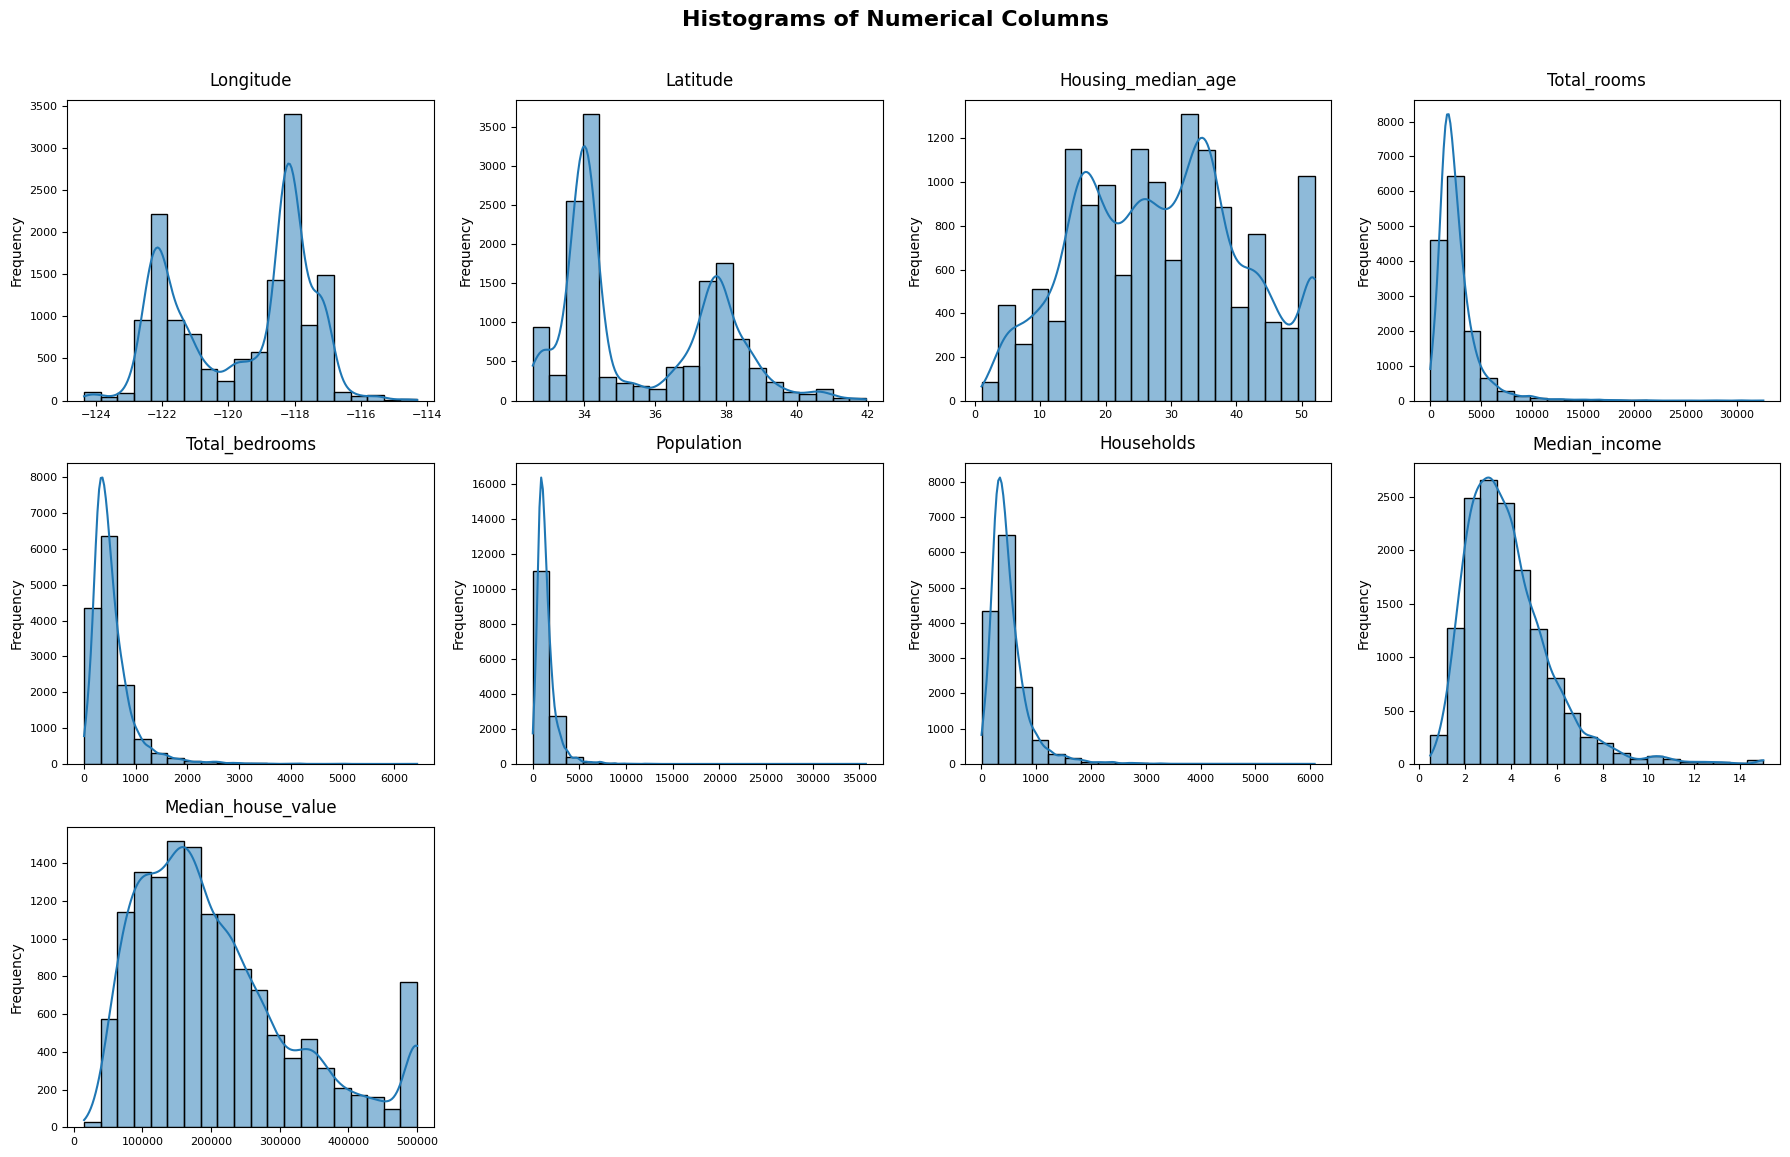

In [296]:
# Filter only numerical columns
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Calculate the number of rows and columns needed for the plots
n_plots = len(numeric_columns)
n_rows = int(np.ceil(n_plots / 4))  # Assuming 4 plots per row

# Create the subplots
fig, axes = plt.subplots(n_rows, 4, figsize=(18, 4 * n_rows))
axes = axes.flatten()

# Plot histograms for each numeric column
for i, column in enumerate(numeric_columns):
    sns.histplot(data=df, x=column, kde=True, bins=20, ax=axes[i])
    axes[i].set_title(column.capitalize(), fontsize=12, pad=10)  # Title with increased fontsize and padding
    axes[i].set_xlabel('')  # Remove x-label for better readability
    axes[i].set_ylabel('Frequency')  # Set y-label as 'Frequency'
    axes[i].tick_params(axis='both', labelsize=8)  # Set smaller tick label font size

# Remove unused subplots if the number of plots is odd
if n_plots % 4 != 0:
    for j in range(n_plots % 4, 4):
        fig.delaxes(axes[-j])

plt.suptitle('Histograms of Numerical Columns', fontsize=16, fontweight='bold')

plt.tight_layout(rect=[0, 0.02, 1, 0.97])
plt.show()


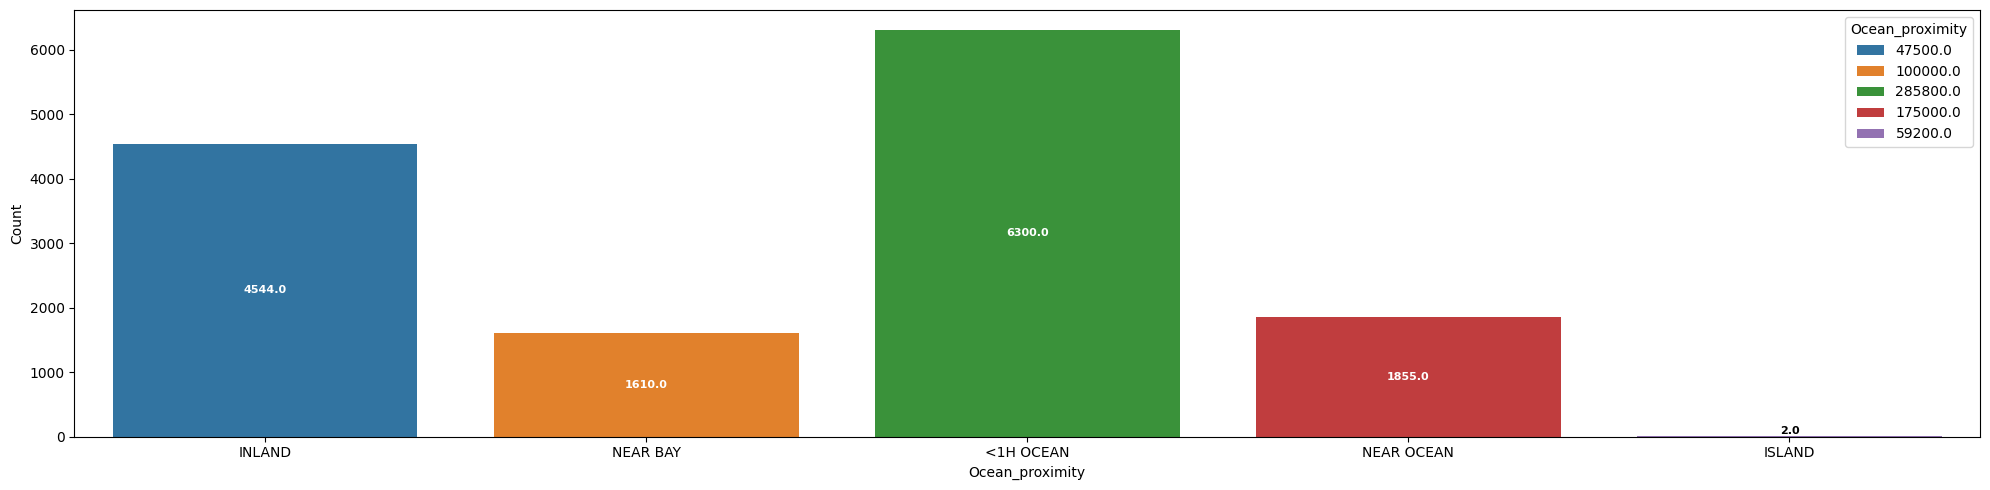

In [297]:
# custom_palette = {0: '#FF6347', 1: '#4682B4'}
unique_values = df[col].unique()
# custom_palette = {value: sns.color_palette()[i] for i, value in enumerate(unique_values)}

categorical_columns2 = df.select_dtypes(include=['object']).columns.tolist()
# categorical_columns2.remove('Surname')  # Removing 'native.country'

n_plots = len(categorical_columns2)

fig, axes = plt.subplots(n_plots, 1, figsize=(20, 5 * n_plots))

axes = np.ravel(axes)

for i, col in enumerate(categorical_columns2):
    sns.countplot(data=df, x=col, hue=col, ax=axes[i])
    axes[i].set_xlabel(col.capitalize())
    axes[i].set_ylabel('Count')
    legend_labels = [str(value) for value in unique_values]
    axes[i].legend(labels=legend_labels, title=col.capitalize() , loc='upper right')

    # Adding annotations
    for p in axes[i].patches:
        width, height = p.get_width(), p.get_height()
        x, y = p.get_xy()
        annotation = height

        if height != 0:
            if height < axes[i].get_ylim()[1] * 0.05:  # Adjust the threshold as needed
                axes[i].annotate(annotation, (x + width / 2, height), ha='center', va='bottom',
                                 fontsize=8, color='black', fontweight='bold')  # Place annotation above bar
            else:
                axes[i].annotate(annotation, (x + width / 2, y + height / 2), ha='center', va='center',
                                 fontsize=8, color='white', fontweight='bold')  # Place annotation inside bar

    
plt.tight_layout()
plt.show()

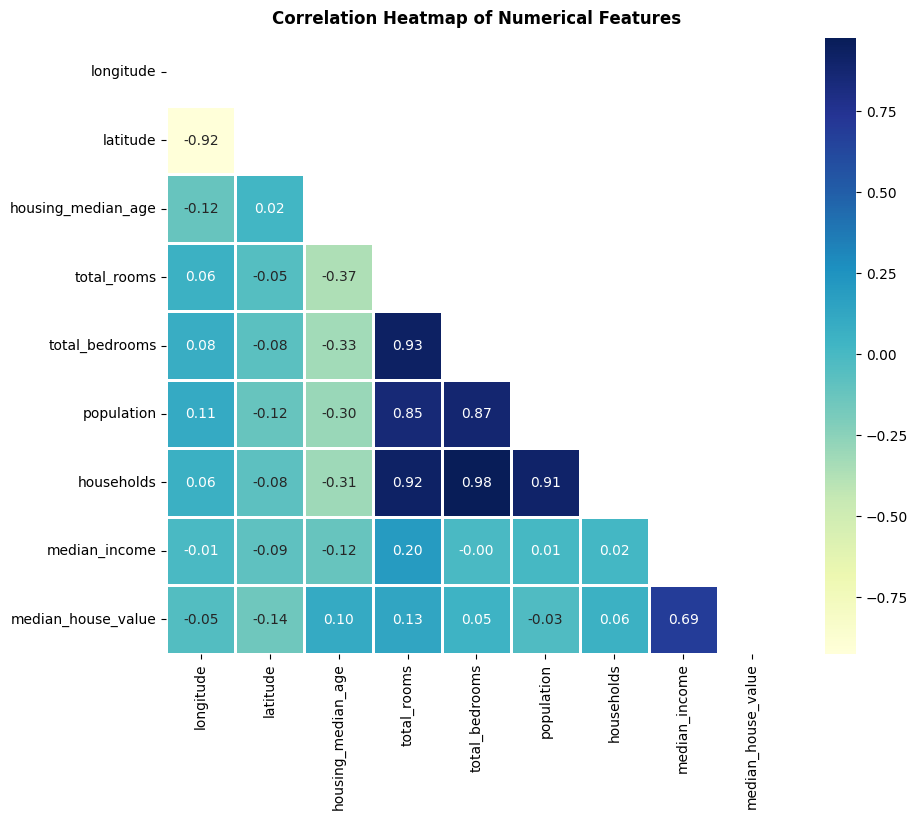

In [298]:
# Select only numerical columns
numerical_data = df.select_dtypes(include=['int64', 'float64'])

correlation_matrix = numerical_data.corr()

plt.figure(figsize=(10, 8))
mask = np.triu(correlation_matrix)  # Mask for upper triangle (change to np.tril for lower triangle)
sns.heatmap(correlation_matrix, annot=True, cmap='YlGnBu', fmt='.2f', linewidths=1, mask=mask)
plt.title('Correlation Heatmap of Numerical Features', pad=10, fontweight='bold')
plt.show()

In [299]:

numerical_data = df.select_dtypes(include=['int64', 'float64'])
# Select numeric columns from DataFrame
data = numerical_data

# Handling missing values by dropping rows with any missing values
data = data.dropna()

# Calculate correlation matrix
correlation_matrix = data.corr(method='spearman')

# Define function to assess correlation strength
def assess_correlation(correlation):
    kuatKorelasi_dict = {
        (0, 0.2): 'sangat lemah (very weak)',
        (0.2, 0.4): 'lemah (weak correlation)',
        (0.4, 0.6): 'sedang (moderate correlation)',
        (0.6, 0.9): 'kuat (strong correlation)',
        (0.9, 1): 'sangat kuat (very strong correlation)'
    }

    result = []

    for col in correlation.columns:
        if col == 'median_house_value':
            continue  # Skip 'charges' column
        for i, kuat in kuatKorelasi_dict.items():
            corr_value = correlation.loc[col, 'median_house_value']
            if i[0] <= abs(corr_value) <= i[1]:
                kuatKorelasi = kuat
                break

        arahKorelasi = 'positif' if corr_value > 0 else 'negatif' if corr_value < 0 else 'netral'

        result.append([col, round(corr_value, 5), kuatKorelasi, arahKorelasi])

    df_result = pd.DataFrame(result, columns=['Column', 'Correlation', 'Strength', 'Direction'])
    df_result.set_index('Column', inplace=True)

    return df_result

# Test the function
result_df = assess_correlation(correlation_matrix)

print('\033[4mCORRELATION SUMMARY BY MEDIAN HOUSE VALUE\033[0m')
result_df


CORRELATION SUMMARY BY MEDIAN HOUSE VALUE


,Correlation,Strength,Direction
Column,,,
longitude,-0.06963,sangat lemah (very weak),negatif
latitude,-0.16793,sangat lemah (very weak),negatif
housing_median_age,0.07192,sangat lemah (very weak),positif
total_rooms,0.19840,sangat lemah (very weak),positif
total_bedrooms,0.08170,sangat lemah (very weak),positif
population,-0.00222,sangat lemah (very weak),negatif
households,0.10742,sangat lemah (very weak),positif
median_income,0.68067,kuat (strong correlation),positif


<hr>

## **Removing Outliers**

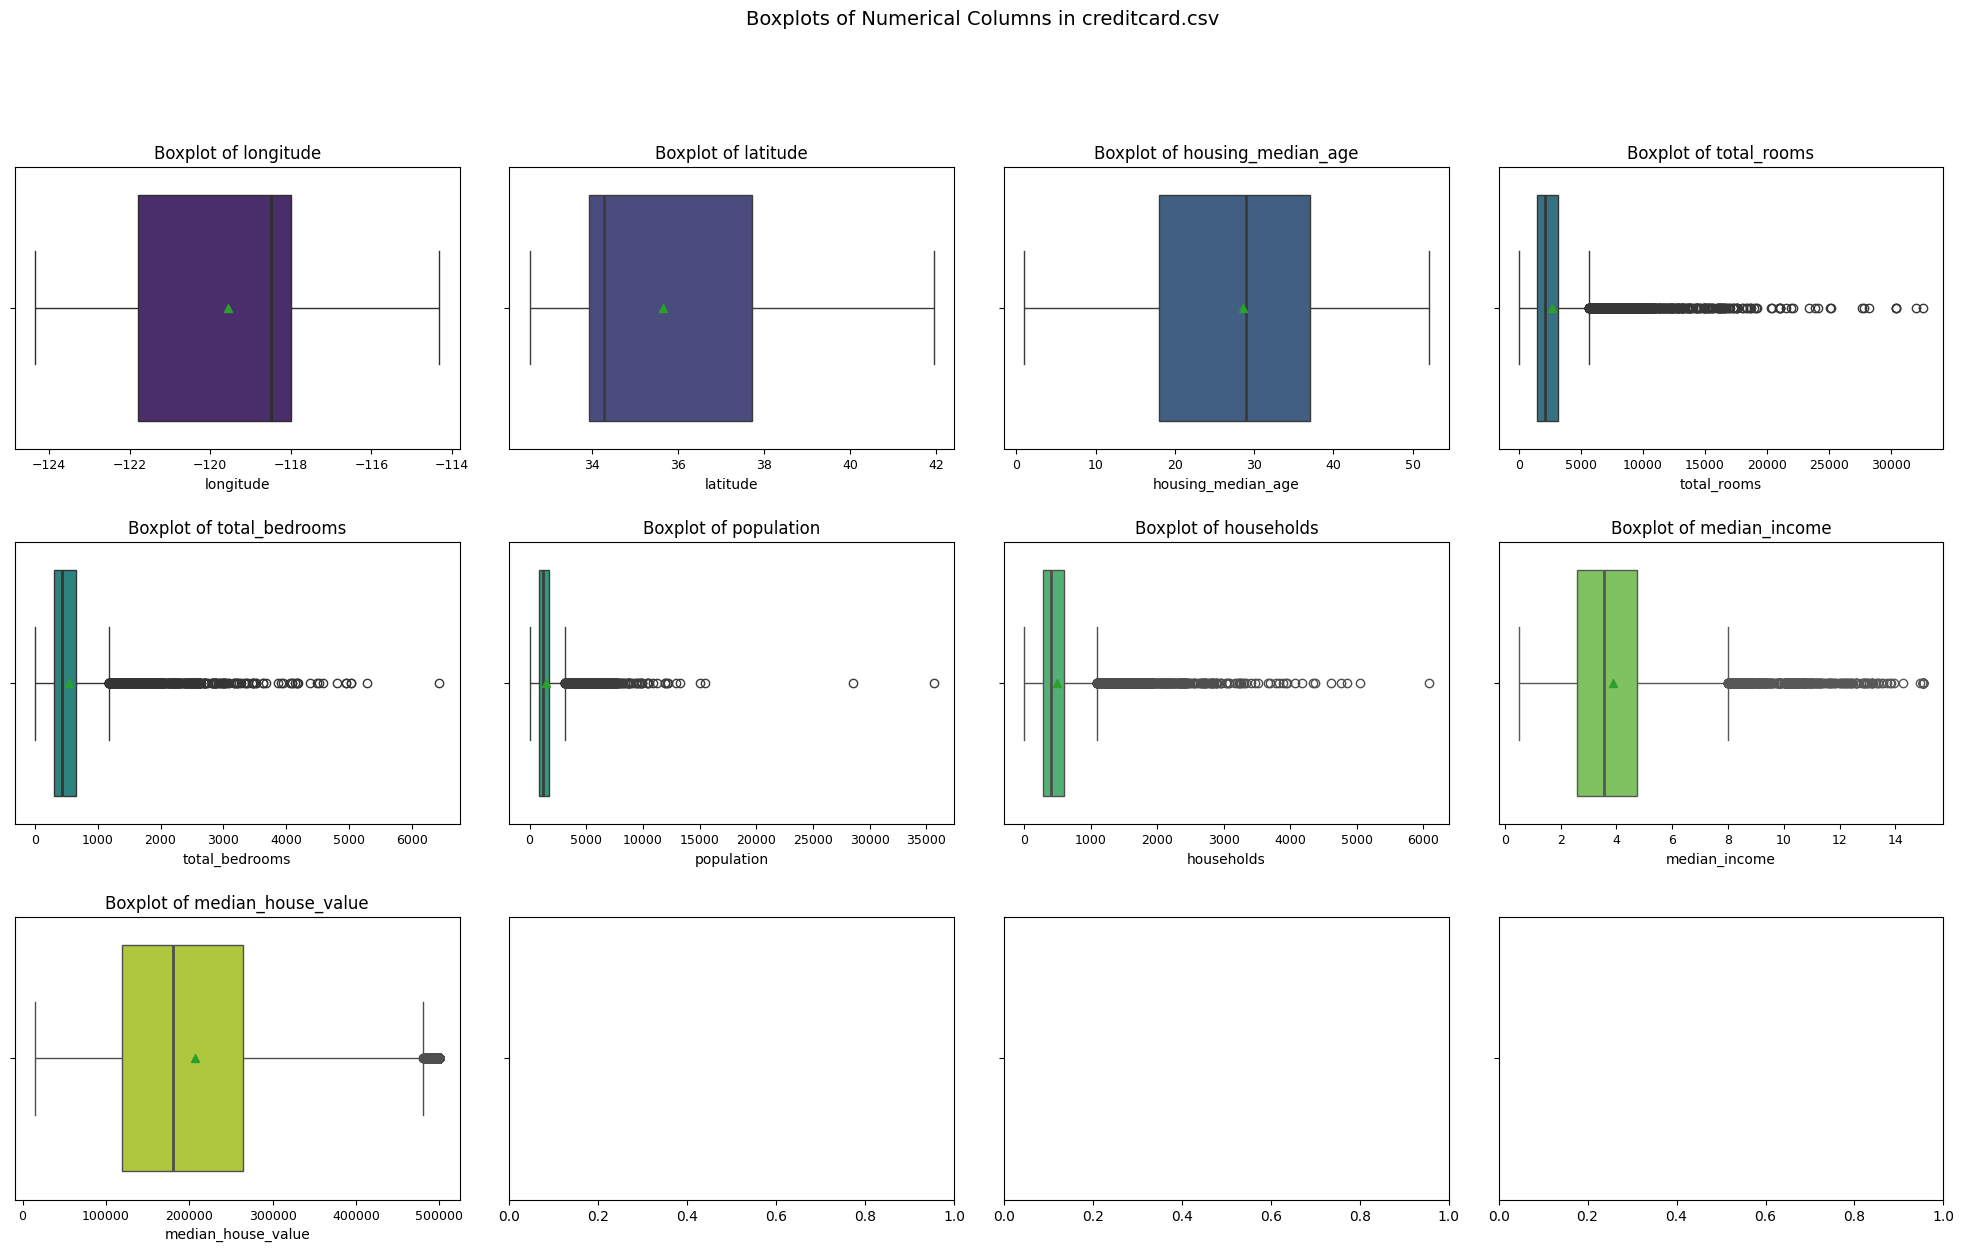

In [300]:
# Select numerical columns
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
selected_columns = numerical_columns[:4]

# Create a visually appealing color palette
color_palette = sns.color_palette('viridis', n_colors=len(numerical_columns))

# Create subplot grid with correct format
fig, axes = plt.subplots(int(np.ceil(len(numerical_columns) / 4)), 4, figsize=(20, 4 * int(np.ceil(len(numerical_columns) / 4))), sharey=True)
axes = axes.flatten()  # Ensure axes is a 1D array of axes objects

# Create boxplots for each numerical column
for i, column in enumerate(numerical_columns):
    sns.boxplot(
        x=df[column], ax=axes[i], color=color_palette[i], showmeans=True, medianprops={'linewidth': 2}
    )
    axes[i].set_title(f'Boxplot of {column}', fontsize=12)
    axes[i].set_xlabel(column, fontsize=10)

    axes[i].tick_params(axis='both', which='major', labelsize=9)  # Adjust tick label size

# Refine overall layout
plt.suptitle('Boxplots of Numerical Columns in creditcard.csv', fontsize=14, y=1.05)  # Add a comprehensive title
plt.tight_layout(pad=2)  # Adjust spacing for visual clarity
plt.show()


In [301]:
# Dictionary to store outliers' information
outliers_info = {}

for column in numerical_columns:
    # Calculate Q1, Q3, and IQR
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    # Calculate bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify outliers
    outliers_condition = (df[column] < lower_bound) | (df[column] > upper_bound)
    outliers = df[outliers_condition]

    # Store information in the dictionary
    outliers_info[column] = {
        'lower_bound': lower_bound,
        'upper_bound': upper_bound,
        'number_of_outliers': outliers_condition.sum(),  # Count of outliers
        'outliers_indices': outliers.index.tolist()  # Indices of outliers
    }


# summary for outliers_summary

outliers_summary = {key: {'bounds': (value['lower_bound'], value['upper_bound']), 
                          'number_of_outliers': value['number_of_outliers']} 
                    for key, value in outliers_info.items()}

# Creating DataFrame from 'outliers_summary'
outliers_summary_df = pd.DataFrame.from_dict(outliers_summary, orient='index')

# Splitting 'bounds' into 'lower_bound' and 'upper_bound' columns
outliers_summary_df[['lower_bound', 'upper_bound']] = outliers_summary_df['bounds'].apply(pd.Series)

# Dropping the original 'bounds' column
outliers_summary_df.drop('bounds', axis=1, inplace=True)

# Reordering the columns for a better view
outliers_summary_df = outliers_summary_df[['lower_bound', 'upper_bound', 'number_of_outliers']]

# Display DataFrame as a styled table
styled_table = outliers_summary_df.style.format('{:.0f}')
styled_table



,lower_bound,upper_bound,number_of_outliers
longitude,-128,-112,0
latitude,28,43,0
housing_median_age,-10,66,0
total_rooms,-1083,5677,905
total_bedrooms,-233,1175,879
population,-623,3129,822
households,-208,1090,836
median_income,-1,8,477
median_house_value,-97125,480275,751


#### **median_house_value**

In [302]:
df_sorted = df.sort_values(by='median_house_value', ascending=False)
df_sorted.head(20)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
8763,-122.01,37.28,22.0,2038.0,260.0,773.0,281.0,9.1569,<1H OCEAN,500001.0
2268,-118.05,34.15,32.0,5131.0,665.0,1877.0,622.0,8.2004,INLAND,500001.0
3993,-122.41,37.79,52.0,3302.0,869.0,1178.0,727.0,3.3681,NEAR BAY,500001.0
10352,-118.51,34.04,38.0,4715.0,691.0,1660.0,637.0,10.1882,<1H OCEAN,500001.0
12605,-118.44,33.81,33.0,3994.0,990.0,1647.0,931.0,5.0106,NEAR OCEAN,500001.0
12602,-117.97,34.15,33.0,2474.0,472.0,1268.0,437.0,6.4576,INLAND,500001.0
1879,-121.88,37.46,5.0,1819.0,245.0,802.0,228.0,10.9722,<1H OCEAN,500001.0
9640,-122.21,37.46,40.0,1777.0,207.0,577.0,207.0,15.0001,NEAR OCEAN,500001.0
8651,-117.27,32.82,35.0,2908.0,595.0,1068.0,529.0,4.1793,NEAR OCEAN,500001.0
9639,-118.79,34.14,7.0,3003.0,504.0,1143.0,466.0,5.8548,NEAR OCEAN,500001.0


In [303]:
df = df[~(df['median_house_value'] >= 500000)]

In [304]:
df.shape

(13621, 10)

#### **median_income**

In [305]:
df_sorted = df.sort_values(by='median_income', ascending=False)
df_sorted.head(20)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
5701,-121.96,37.74,2.0,200.0,20.0,25.0,9.0,15.0001,<1H OCEAN,350000.0
14027,-121.96,37.13,26.0,50.0,5.0,17.0,4.0,15.0001,<1H OCEAN,400000.0
947,-117.71,33.51,11.0,2198.0,252.0,883.0,281.0,13.1477,<1H OCEAN,487000.0
909,-117.89,33.89,17.0,1671.0,192.0,678.0,206.0,13.1107,<1H OCEAN,467600.0
3758,-121.92,37.74,8.0,452.0,51.0,140.0,43.0,12.5915,<1H OCEAN,432400.0
9807,-121.81,37.38,29.0,570.0,76.0,244.0,72.0,12.3292,<1H OCEAN,416700.0
13561,-122.19,37.84,18.0,1617.0,210.0,533.0,194.0,11.6017,NEAR BAY,392600.0
8101,-117.80,33.63,15.0,3236.0,451.0,1289.0,416.0,11.1121,<1H OCEAN,493000.0
9965,-117.58,33.60,5.0,5348.0,659.0,1862.0,555.0,11.0567,<1H OCEAN,495400.0
969,-117.79,33.76,25.0,2037.0,252.0,796.0,249.0,11.0546,<1H OCEAN,487200.0


In [306]:
df = df[~(df['median_income'] >= 11)]

In [307]:
df.shape

(13611, 10)

#### **households**

In [308]:
df_sorted = df.sort_values(by='households', ascending=False)
df_sorted.head(20)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
4124,-121.79,36.64,11.0,32627.0,6445.0,28566.0,6082.0,2.3087,<1H OCEAN,118800.0
8061,-117.78,34.03,8.0,32054.0,5290.0,15507.0,5050.0,6.0191,<1H OCEAN,253900.0
10900,-121.53,38.48,5.0,27870.0,5027.0,11935.0,4855.0,4.8811,INLAND,212200.0
12511,-117.42,33.35,14.0,25135.0,4819.0,35682.0,4769.0,2.5729,<1H OCEAN,134400.0
9809,-117.34,33.98,10.0,17286.0,4952.0,9851.0,4616.0,1.7579,INLAND,103400.0
14295,-121.68,36.72,12.0,19234.0,4492.0,12153.0,4372.0,3.2652,<1H OCEAN,152800.0
13215,-117.12,33.52,4.0,30401.0,4957.0,13251.0,4339.0,4.5841,<1H OCEAN,212300.0
14362,-117.22,32.86,4.0,16289.0,4585.0,7604.0,4176.0,3.6287,NEAR OCEAN,280800.0
12657,-117.87,34.04,7.0,27700.0,4179.0,15037.0,4072.0,6.6288,<1H OCEAN,339700.0
6058,-117.27,33.15,4.0,23915.0,4135.0,10877.0,3958.0,4.6357,NEAR OCEAN,244900.0


In [309]:
df = df[~(df['households'] >= 3000)]

#### **population**

In [310]:
df_sorted = df.sort_values(by='population', ascending=False)
df_sorted.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
4168,-121.61,36.69,19.0,9899.0,2617.0,11272.0,2528.0,2.0244,<1H OCEAN,118500.0
11001,-121.94,38.27,35.0,10869.0,2226.0,9879.0,2152.0,2.5681,INLAND,81300.0
6431,-117.83,33.97,11.0,21533.0,3078.0,9671.0,2890.0,7.0329,<1H OCEAN,368300.0
8787,-117.19,33.90,3.0,21060.0,3366.0,9623.0,2812.0,4.1890,INLAND,143000.0
474,-117.22,33.92,5.0,16884.0,2865.0,9509.0,2688.0,4.0938,INLAND,130900.0
3903,-117.79,34.02,5.0,18690.0,2862.0,9427.0,2777.0,6.4266,<1H OCEAN,315600.0
10463,-118.47,34.23,22.0,8350.0,2717.0,9135.0,2452.0,2.5008,<1H OCEAN,160000.0
5895,-117.92,33.98,10.0,16414.0,2919.0,8907.0,2714.0,6.1552,<1H OCEAN,362500.0
5597,-117.29,33.97,4.0,18767.0,3032.0,8805.0,2723.0,4.6667,INLAND,160600.0
711,-121.86,37.37,15.0,8162.0,2124.0,8793.0,2086.0,3.3306,<1H OCEAN,210300.0


In [311]:
df = df[~(df['population'] >= 9000)]

#### **total_rooms**

In [312]:
df_sorted = df.sort_values(by='total_rooms', ascending=False)
df_sorted.head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
6578,-116.36,33.78,6.0,24121.0,4522.0,4176.0,2221.0,3.3799,INLAND,239300.0
12470,-117.16,33.57,2.0,20391.0,3245.0,7132.0,2716.0,3.9443,<1H OCEAN,187300.0
7088,-116.33,33.75,5.0,19107.0,3923.0,2880.0,1376.0,4.0360,INLAND,158500.0
5597,-117.29,33.97,4.0,18767.0,3032.0,8805.0,2723.0,4.6667,INLAND,160600.0
9968,-122.24,37.72,5.0,18634.0,2885.0,7427.0,2718.0,7.6110,NEAR BAY,350700.0


In [313]:
df = df[~(df['total_rooms'] >= 19000)]

#### **total_bedrooms**

In [314]:
df_sorted = df.sort_values(by='total_bedrooms', ascending=False)
df_sorted.head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
8250,-116.38,33.74,7.0,17579.0,3479.0,3581.0,1820.0,4.0840,INLAND,194500.0
824,-118.56,34.41,4.0,17313.0,3224.0,6902.0,2707.0,5.6798,<1H OCEAN,320900.0
5712,-117.52,33.89,2.0,17978.0,3217.0,7305.0,2463.0,5.1695,INLAND,220800.0
7303,-118.28,34.07,25.0,7522.0,3179.0,7221.0,2902.0,2.0173,<1H OCEAN,177500.0
7127,-117.22,32.95,4.0,18123.0,3173.0,7301.0,2964.0,6.3570,NEAR OCEAN,322500.0


In [315]:
df = df[~(df['total_bedrooms'] >= 3000)]

In [316]:
df.shape

(13558, 10)

<hr>

## **3. Define X and y**
- Feature (X): 'longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity'
- Target (y): 'median_house_value'

In [317]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity', 'median_house_value'],
      dtype='object')

In [318]:
X = df.drop(columns=['median_house_value'])
y = df['median_house_value']

<hr>

## **4. Data Splitting**
- Train (80%) dan Test (20%)


In [319]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=0
)

<hr>

## **5. Data Preprocessing** 

'longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity', 'median_house_value'

In [320]:
transformer = ColumnTransformer([
    ('onehot', OneHotEncoder(drop='first'), ['ocean_proximity']),
    ('robust', RobustScaler(), ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'population', 'median_income','total_bedrooms','households'])
], remainder='passthrough')
transformer

ColumnTransformer(remainder='passthrough',
                  transformers=[('onehot', OneHotEncoder(drop='first'),
                                 ['ocean_proximity']),
                                ('robust', RobustScaler(),
                                 ['longitude', 'latitude', 'housing_median_age',
                                  'total_rooms', 'population', 'median_income',
                                  'total_bedrooms', 'households'])])

In [321]:
def calc_vif(X):
    
    vif_df = pd.DataFrame({
        'Feature': X.columns, 
        'VIF': [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]})
    vif_df['Acceptance'] = np.where(vif_df['VIF'] < 4, 'Yes', 'No')
    
    return vif_df

def calc_vif_auto(X):
    dropped_columns = []  # List untuk menyimpan kolom yang dihapus
    
    while True:
        vif_values = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
        max_vif_index = np.argmax(vif_values)
        max_vif = max(vif_values)
        
        if max_vif >= 4:
            column_to_drop = X.columns[max_vif_index]
            dropped_columns.append(column_to_drop)      # Menyimpan kolom yang dihapus
            X = X.drop(column_to_drop, axis=1)
        else:
            break

    vif_df = pd.DataFrame({
        'Feature': X.columns,
        'VIF': [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    })
    vif_df['Acceptance'] = np.where(vif_df['VIF'] < 4, 'Yes', 'No')
    

    print("Kolom yang dihapus:")
    print(dropped_columns)
    
    return vif_df

### **Checking Multicollinearity**

In [322]:
transformed_train = pd.DataFrame(transformer.fit_transform(X_train), columns=transformer.get_feature_names_out())
transformed_train.head()

,onehot__ocean_proximity_INLAND,onehot__ocean_proximity_ISLAND,onehot__ocean_proximity_NEAR BAY,onehot__ocean_proximity_NEAR OCEAN,robust__longitude,robust__latitude,robust__housing_median_age,robust__total_rooms,robust__population,robust__median_income,robust__total_bedrooms,robust__households
0,1.0,0.0,0.0,0.0,-0.600529,0.839050,-0.105263,0.113010,0.081305,0.078508,-0.031272,-0.186335
1,0.0,0.0,0.0,0.0,0.052910,-0.071240,0.473684,-0.391187,-0.083445,-0.961017,-0.318408,-0.350932
2,1.0,0.0,0.0,0.0,0.269841,-0.089710,-0.421053,-0.835432,-0.748863,0.030461,-0.832978,-0.832298
3,0.0,0.0,0.0,0.0,0.119048,-0.052770,-0.263158,0.217326,2.826424,-0.451145,0.841507,0.937888
4,0.0,0.0,0.0,0.0,0.132275,-0.153034,-0.631579,0.297662,0.095213,1.650006,-0.176262,-0.086957


In [323]:
calc_vif(transformed_train)

,Feature,VIF,Acceptance
0,onehot__ocean_proximity_INLAND,3.322232,Yes
1,onehot__ocean_proximity_ISLAND,1.000991,Yes
2,onehot__ocean_proximity_NEAR BAY,1.614905,Yes
3,onehot__ocean_proximity_NEAR OCEAN,1.104616,Yes
4,robust__longitude,22.858987,No
5,robust__latitude,27.680598,No
6,robust__housing_median_age,1.369394,Yes
7,robust__total_rooms,13.330142,No
8,robust__population,6.349106,No
9,robust__median_income,1.807612,Yes


The results of the first multicollinearity test show that the **total_bedrooms** and **households** columns have very high VIFs

In [324]:
X = df.drop(columns=['median_house_value','total_bedrooms','households'])
y = df['median_house_value']

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=0
)

transformer = ColumnTransformer([
    ('onehot', OneHotEncoder(drop='first'), ['ocean_proximity']),
    ('robust', RobustScaler(), ['latitude','longitude','housing_median_age', 'total_rooms', 'population', 'median_income'])
], remainder='passthrough')
transformer

ColumnTransformer(remainder='passthrough',
                  transformers=[('onehot', OneHotEncoder(drop='first'),
                                 ['ocean_proximity']),
                                ('robust', RobustScaler(),
                                 ['latitude', 'longitude', 'housing_median_age',
                                  'total_rooms', 'population',
                                  'median_income'])])

<hr>

## **6. Cross Validation**

In [325]:

# Define algoritma yang digunakan
lr = LinearRegression()
knn = KNeighborsRegressor()
dt = DecisionTreeRegressor(random_state=42)
rf = RandomForestRegressor(random_state=42)
xgb = XGBRegressor(random_state=42)
ridge = Ridge()
lasso = Lasso()
elastic_net = ElasticNet()
Ada_Boost = AdaBoostRegressor()
gdt = GradientBoostingRegressor(random_state=42)

# Pemodelan dilakukan dalam skala logaritmik, namun kemudian di-inverse kembali untuk interpretasi
ttr_lr = TransformedTargetRegressor(lr, func = np.log, inverse_func = np.exp)
ttr_knn = TransformedTargetRegressor(knn, func = np.log, inverse_func = np.exp)
ttr_dt = TransformedTargetRegressor(dt, func = np.log, inverse_func = np.exp)
ttr_rf = TransformedTargetRegressor(rf, func = np.log, inverse_func = np.exp)
ttr_gdt = TransformedTargetRegressor(gdt, func = np.log, inverse_func = np.exp)
ttr_xgb = TransformedTargetRegressor(xgb, func = np.log, inverse_func = np.exp)
ttr_ridge = TransformedTargetRegressor(ridge, func = np.log, inverse_func = np.exp)
ttr_lasso = TransformedTargetRegressor(lasso, func = np.log, inverse_func = np.exp)
ttr_enet = TransformedTargetRegressor(elastic_net, func = np.log, inverse_func = np.exp)
ttr_Ada_Boost = TransformedTargetRegressor(Ada_Boost, func = np.log, inverse_func = np.exp)

# Kandidat algoritma
models = [ttr_lr, ttr_knn, ttr_dt, ttr_rf, ttr_gdt, ttr_xgb,  ttr_ridge, ttr_lasso, ttr_enet, ttr_Ada_Boost]

score_rmse = []
nilai_mean_rmse = []
nilai_std_rmse = []

score_mae = []
nilai_mean_mae = []
nilai_std_mae = []

score_mape = []
nilai_mean_mape = []
nilai_std_mape = []

# Mencari algoritma terbaik berdasarkan tiap metrics
for i in models:

    estimator = Pipeline([
        ('preprocessing', transformer),
        ('model', i)
    ])

    # RMSE
    model_cv_rmse = cross_val_score(
        estimator, 
        X_train, 
        y_train, 
        cv=5, 
        scoring='neg_root_mean_squared_error', 
        error_score='raise'
        )

    # print(model_cv_rmse, i)

    score_rmse.append(model_cv_rmse)
    nilai_mean_rmse.append(model_cv_rmse.mean())
    nilai_std_rmse.append(model_cv_rmse.std())

    # MAE
    model_cv_mae = cross_val_score(
        estimator, 
        X_train, 
        y_train, 
        cv=5, 
        scoring='neg_mean_absolute_error', 
        error_score='raise'
        )

    # print(model_cv_mae, i)

    score_mae.append(model_cv_mae)
    nilai_mean_mae.append(model_cv_mae.mean())
    nilai_std_mae.append(model_cv_mae.std())

    # MAPE
    model_cv_mape = cross_val_score(
        estimator, 
        X_train, 
        y_train, 
        cv=5, 
        scoring='neg_mean_absolute_percentage_error', 
        error_score='raise'
        )

    # print(model_cv_mape, i)
    
    score_mape.append(model_cv_mape)
    nilai_mean_mape.append(model_cv_mape.mean())
    nilai_std_mape.append(model_cv_mape.std())


In [326]:
# Evaluasi hasil dari 5 kandidat algoritma yang digunakan
df_th = pd.DataFrame({
    'Model': ['Linear Regression', 'KNN Regression', 'Decision Tree Regression', 'Random Forest Regression', 'Gradient Boost Regression','Extreme Gradient Boost', 'Ridge', 'Lasso', 'Elastic-Net', 'AdaBoostRegressor'],
    'Mean_RMSE': nilai_mean_rmse,
    'Std_RMSE': nilai_std_rmse,
    'Mean_MAE': nilai_mean_mae,
    'Std_MAE': nilai_std_mae,
    'Mean_MAPE': nilai_mean_mape,
    'Std_MAPE': nilai_std_mape
})

sorted_df_mean_rmse = df_th.sort_values(by='Mean_RMSE', ascending=False)[['Model','Mean_RMSE','Std_RMSE']]
sorted_df_mean_mae = df_th.sort_values(by='Mean_MAE', ascending=False)[['Model','Mean_MAE','Std_MAE']]
sorted_df_mean_mape = df_th.sort_values(by='Mean_MAPE', ascending=False)[['Model','Mean_MAPE','Std_MAPE']]

display(sorted_df_mean_rmse, sorted_df_mean_mae, sorted_df_mean_mape)

,Model,Mean_RMSE,Std_RMSE
5,Extreme Gradient Boost,-44895.068063,935.536445
3,Random Forest Regression,-46412.381353,1163.465704
4,Gradient Boost Regression,-52462.370892,1137.131590
1,KNN Regression,-58423.873506,1095.649565
0,Linear Regression,-62947.354249,1000.688050
6,Ridge,-62965.325045,994.049166
2,Decision Tree Regression,-63662.608629,1129.735277
9,AdaBoostRegressor,-69173.666675,1595.839292
7,Lasso,-99591.373227,952.833111
8,Elastic-Net,-99591.373227,952.833111


,Model,Mean_MAE,Std_MAE
5,Extreme Gradient Boost,-29851.659706,485.358999
3,Random Forest Regression,-30487.134256,706.014867
4,Gradient Boost Regression,-36183.869713,768.551350
1,KNN Regression,-40252.528626,428.216481
2,Decision Tree Regression,-42279.634054,419.019492
0,Linear Regression,-44625.529566,554.293125
6,Ridge,-44634.176757,551.040984
9,AdaBoostRegressor,-49254.100887,1041.633366
7,Lasso,-76401.532820,807.244770
8,Elastic-Net,-76401.532820,807.244770


,Model,Mean_MAPE,Std_MAPE
5,Extreme Gradient Boost,-0.165621,0.002527
3,Random Forest Regression,-0.168939,0.003645
4,Gradient Boost Regression,-0.199161,0.003266
1,KNN Regression,-0.223404,0.002318
2,Decision Tree Regression,-0.240739,0.006526
0,Linear Regression,-0.251293,0.001428
6,Ridge,-0.251316,0.001380
9,AdaBoostRegressor,-0.280880,0.007466
7,Lasso,-0.486818,0.008610
8,Elastic-Net,-0.486818,0.008610


### **Predict to Test Set With The Benchmark Models**

In [327]:
# Benchmark 3 model terbaik
models = {
    'gdt': GradientBoostingRegressor(random_state=42),
    'rf': RandomForestRegressor(random_state=42),
    'xgb': XGBRegressor(random_state=42)
}

score_rmse = []
score_mae = []
score_mape = []

# Prediksi pada test set
for i in models:
    model = Pipeline([
        ('preprocessing', transformer),
        ('model', models[i])
    ])

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    score_rmse.append(np.sqrt(mean_squared_error(y_test, y_pred)))
    score_mae.append(mean_absolute_error(y_test, y_pred))
    score_mape.append(mean_absolute_percentage_error(y_test, y_pred))


# Use a list of tuples for creating the DataFrame
score_before_tuning = pd.DataFrame({'RMSE': score_rmse, 'MAE': score_mae, 'MAPE': score_mape}, index=models.keys())

score_before_tuning



,RMSE,MAE,MAPE
gdt,51044.673316,36962.343965,0.225822
rf,45567.517025,31126.123086,0.189919
xgb,43560.614335,29867.865074,0.184225


Berdasarkan Besar Persentase Mean dan Standar Deviasi Mendekati 0

Maka dari itu algoritma yang dipakai adalah <mark style='background-color: lightgreen'>‎ **Extreme Gradient Boosting** ‎

<hr>

## **7. Hyperparameter Tuning**

In [328]:
# Kedalaman pohon
max_depth = list(np.arange(1, 11))

# Learning rate
learning_rate = list(np.arange(1, 100)/100)

# Jumlah pohon
n_estimators = list(np.arange(100, 201))

# Jumlah baris tiap pohon (% dari total baris train set)
subsample = list(np.arange(2, 10)/10)

# Gamma (min_impurity_decrease)
gamma = list(np.arange(1, 11)) # Semakin besar nilainya, semakin konservatif/simpel modelnya

# Jumlah feature yang digunakan untuk tiap pohon (% dari total kolom train set)
colsample_bytree = list(np.arange(1, 10)/10)

# Alpha (regularization)
reg_alpha = list(np.logspace(-3, 1, 10)) # Semakin besar nilainya, semakin konservatif/simpel modelnya

# Hyperparam space XGboost
hyperparam_space_xgb = {
    'model__max_depth': max_depth, 
    'model__learning_rate': learning_rate,
    'model__n_estimators': n_estimators,
    'model__subsample': subsample,
    'model__gamma': gamma,
    'model__colsample_bytree': colsample_bytree,
    'model__reg_alpha': reg_alpha
}

hyperparam_space_xgb_1 = {
    'model__learning_rate': learning_rate
}

In [329]:
# Benchmark model dengan hyperparameter tuning
xgb = XGBRegressor(random_state=42, verbosity=0)

# Membuat algorithm chains
estimator_xgb = Pipeline([
        ('preprocessing', transformer),
        ('model', xgb)
        ])

crossval = KFold(n_splits=5, shuffle=True, random_state=1)

# Hyperparameter tuning
grid_xgb_1 = GridSearchCV(
    estimator_xgb, 
    param_grid = hyperparam_space_xgb_1,
    cv = crossval, 
    scoring = ['neg_root_mean_squared_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error'], 
    n_jobs = -1,
    refit = 'neg_root_mean_squared_error', # Hanya bisa memilih salah stau metric untuk optimisasi
)

In [330]:
# Fitting data training untuk mencari parameter terbaik
grid_xgb_1.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=1, shuffle=True),
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('onehot',
                                                                         OneHotEncoder(drop='first'),
                                                                         ['ocean_proximity']),
                                                                        ('robust',
                                                                         RobustScaler(),
                                                                         ['latitude',
                                                                          'longitude',
                                                                          'housing_median_age',
                                                                          'total_rooms',
                                                                          'population',
                                                                          'median_income'])])),
                                       ('model',
                                        XGB...
                                                     random_state=42, ...))]),
             n_jobs=-1,
             param_grid={'model__learning_rate': [0.01, 0.02, 0.03, 0.04, 0.05,
                                                  0.06, 0.07, 0.08, 0.09, 0.1,
                                                  0.11, 0.12, 0.13, 0.14, 0.15,
                                                  0.16, 0.17, 0.18, 0.19, 0.2,
                                                  0.21, 0.22, 0.23, 0.24, 0.25,
                                                  0.26, 0.27, 0.28, 0.29, 0.3, ...]},
             refit='neg_root_mean_squared_error',
             scoring=['neg_root_mean_squared_error', 'neg_mean_absolute_error',
                      'neg_mean_absolute_percentage_error'])

In [331]:
print("Best Parameters from Grid Search:", grid_xgb_1.best_params_)

Best Parameters from Grid Search: {'model__learning_rate': 0.19}


In [332]:
hyperparam_space_xgb_2 = {
    'model__learning_rate': [0.2],
    'model__n_estimators': n_estimators
}

grid_xgb_2 = GridSearchCV(
    estimator_xgb, 
    param_grid = hyperparam_space_xgb_2,
    cv = crossval, 
    scoring = ['neg_root_mean_squared_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error'], 
    n_jobs = -1,
    refit = 'neg_root_mean_squared_error', # Hanya bisa memilih salah stau metric untuk optimisasi
)

In [333]:
grid_xgb_2.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=1, shuffle=True),
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('onehot',
                                                                         OneHotEncoder(drop='first'),
                                                                         ['ocean_proximity']),
                                                                        ('robust',
                                                                         RobustScaler(),
                                                                         ['latitude',
                                                                          'longitude',
                                                                          'housing_median_age',
                                                                          'total_rooms',
                                                                          'population',
                                                                          'median_income'])])),
                                       ('model',
                                        XGB...
                                                     random_state=42, ...))]),
             n_jobs=-1,
             param_grid={'model__learning_rate': [0.2],
                         'model__n_estimators': [100, 101, 102, 103, 104, 105,
                                                 106, 107, 108, 109, 110, 111,
                                                 112, 113, 114, 115, 116, 117,
                                                 118, 119, 120, 121, 122, 123,
                                                 124, 125, 126, 127, 128, 129, ...]},
             refit='neg_root_mean_squared_error',
             scoring=['neg_root_mean_squared_error', 'neg_mean_absolute_error',
                      'neg_mean_absolute_percentage_error'])

In [334]:
print("Best Parameters from Grid Search:", grid_xgb_2.best_params_)

Best Parameters from Grid Search: {'model__learning_rate': 0.2, 'model__n_estimators': 185}


In [335]:
hyperparam_space_xgb_3 = {
    'model__learning_rate': [0.2], 
    'model__n_estimators': [200],
    'model__max_depth': max_depth, 
    'model__gamma': gamma,
}

grid_xgb_3 = GridSearchCV(
    estimator_xgb, 
    param_grid = hyperparam_space_xgb_3,
    cv = crossval, 
    scoring = ['neg_root_mean_squared_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error'], 
    n_jobs = -1,
    refit = 'neg_root_mean_squared_error', # Hanya bisa memilih salah stau metric untuk optimisasi
)

In [336]:
grid_xgb_3.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=1, shuffle=True),
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('onehot',
                                                                         OneHotEncoder(drop='first'),
                                                                         ['ocean_proximity']),
                                                                        ('robust',
                                                                         RobustScaler(),
                                                                         ['latitude',
                                                                          'longitude',
                                                                          'housing_median_age',
                                                                          'total_rooms',
                                                                          'population',
                                                                          'median_income'])])),
                                       ('model',
                                        XGB...
                                                     n_jobs=None,
                                                     num_parallel_tree=None,
                                                     random_state=42, ...))]),
             n_jobs=-1,
             param_grid={'model__gamma': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'model__learning_rate': [0.2],
                         'model__max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'model__n_estimators': [200]},
             refit='neg_root_mean_squared_error',
             scoring=['neg_root_mean_squared_error', 'neg_mean_absolute_error',
                      'neg_mean_absolute_percentage_error'])

In [337]:
print("Best Parameters from Grid Search:", grid_xgb_3.best_params_)

Best Parameters from Grid Search: {'model__gamma': 1, 'model__learning_rate': 0.2, 'model__max_depth': 5, 'model__n_estimators': 200}


<hr>

## **8. Predict to Test Set**

In [338]:
models = {
    'xgb': XGBRegressor(random_state=42, verbosity=0)
}

score_rmse = []
score_mae = []
score_mape = []

# Prediksi pada test set
for i in models:
    model = Pipeline([
        ('preprocessing', transformer),
        ('model', models[i])
    ])

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    score_rmse.append(np.sqrt(mean_squared_error(y_test, y_pred)))
    score_mae.append(mean_absolute_error(y_test, y_pred))
    score_mape.append(round(mean_absolute_percentage_error(y_test, y_pred) * 100, 2))

# Use a list of tuples for creating the DataFrame
score_before_tuning = pd.DataFrame({
    'Score MAE': score_mae,
    'Score MAPE': score_mape,
    'Score RMSE': score_rmse
}, index=['Extreme Gradient Boost Before Tuning'])

score_before_tuning['Score MAPE'] = score_before_tuning['Score MAPE'].astype(str) + '%'

score_before_tuning

,Score MAE,Score MAPE,Score RMSE
Extreme Gradient Boost Before Tuning,29867.865074,18.42%,43560.614335


In [339]:
xgb_tuning = grid_xgb_3.best_estimator_

xgb_tuning.fit(X_train, y_train)

y_pred_cat_tuning = xgb_tuning.predict(X_test)

mae_cat_tuning = mean_absolute_error(y_test, y_pred_cat_tuning)
mape_cat_tuning = round(mean_absolute_percentage_error(y_test, y_pred_cat_tuning) * 100, 2)
rmse_cat_tuning = np.sqrt(mean_squared_error(y_test, y_pred_cat_tuning))

score_after_tuning = pd.DataFramescore_after_tuning = pd.DataFrame({
    'Score MAE': [mae_cat_tuning],
    'Score MAPE': [mape_cat_tuning],
    'Score RMSE': [rmse_cat_tuning]
}, index=["Extreme Gradient Boost After Tuning"])

score_after_tuning['Score MAPE'] = score_after_tuning['Score MAPE'].astype(str) + '%'

score_after_tuning

,Score MAE,Score MAPE,Score RMSE
Extreme Gradient Boost After Tuning,28642.197019,17.63%,41840.699026


In [340]:
# Concatenate horizontally
result_df = pd.concat([score_before_tuning, score_after_tuning], axis=0)

# Print the resulting DataFrame
result_df

,Score MAE,Score MAPE,Score RMSE
Extreme Gradient Boost Before Tuning,29867.865074,18.42%,43560.614335
Extreme Gradient Boost After Tuning,28642.197019,17.63%,41840.699026


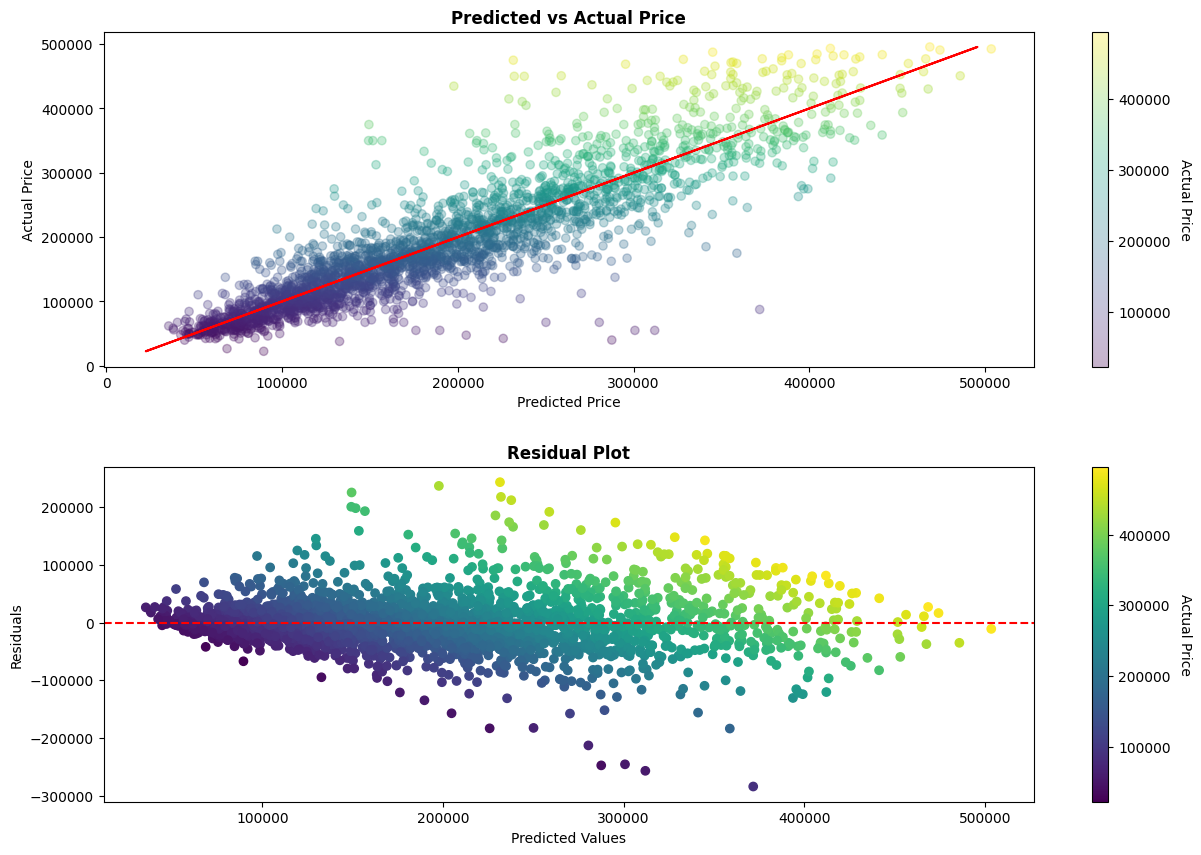

In [341]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 10))

# Plot actual vs predicted price
scatter_plot = ax1.scatter(y_pred, y_test, alpha=0.3, c=y_test, cmap='viridis')  # Using 'viridis' colormap
ax1.plot(y_test, y_test, color='red', alpha=1)
ax1.set_title('Predicted vs Actual Price', fontweight='bold')
ax1.set_xlabel('Predicted Price')
ax1.set_ylabel('Actual Price')

# Add colorbar to the scatter plot
cbar = plt.colorbar(scatter_plot)
cbar.set_label('Actual Price', rotation=270, labelpad=15)

# Plot residual plot
diff = y_test - y_pred
scatter_residual = ax2.scatter(y_pred, diff, c=y_test, cmap='viridis')  # Using 'viridis' colormap
ax2.axhline(y=0, color='red', linestyle='--')
ax2.set_xlabel('Predicted Values')
ax2.set_ylabel('Residuals')
ax2.set_title('Residual Plot', fontweight='bold')

# Add colorbar to the residual scatter plot
cbar_residual = plt.colorbar(scatter_residual)
cbar_residual.set_label('Actual Price', rotation=270, labelpad=15)

plt.subplots_adjust(hspace=0.3)
plt.show()

## **Feature Importances**

In [342]:
xgb_tuning['model'].feature_importances_

array([0.55283093, 0.02584981, 0.03200496, 0.04050001, 0.03943108,
       0.04684639, 0.02480514, 0.01886831, 0.01917532, 0.19968805],
      dtype=float32)

In [343]:
# Plot feature importances
feature_imp = pd.DataFrame(xgb_tuning['model'].feature_importances_, transformer.get_feature_names_out()).reset_index().rename(columns={'index' : 'Feature', 0 : 'Importance'})
feature_impx = feature_imp.sort_values('Importance',ascending=False)
feature_impx

,Feature,Importance
0,onehot__ocean_proximity_INLAND,0.552831
9,robust__median_income,0.199688
5,robust__longitude,0.046846
3,onehot__ocean_proximity_NEAR OCEAN,0.040500
4,robust__latitude,0.039431
2,onehot__ocean_proximity_NEAR BAY,0.032005
1,onehot__ocean_proximity_ISLAND,0.025850
6,robust__housing_median_age,0.024805
8,robust__population,0.019175
7,robust__total_rooms,0.018868


In [344]:
# Remove prefixes from the 'Feature' column
feature_impx['Feature'] = feature_impx['Feature'].str.replace('onehot__', '').str.replace('robust__', '').str.replace('_', ' ')

# Print the modified DataFrame
feature_impx

,Feature,Importance
0,ocean proximity INLAND,0.552831
9,median income,0.199688
5,longitude,0.046846
3,ocean proximity NEAR OCEAN,0.040500
4,latitude,0.039431
2,ocean proximity NEAR BAY,0.032005
1,ocean proximity ISLAND,0.025850
6,housing median age,0.024805
8,population,0.019175
7,total rooms,0.018868


float32


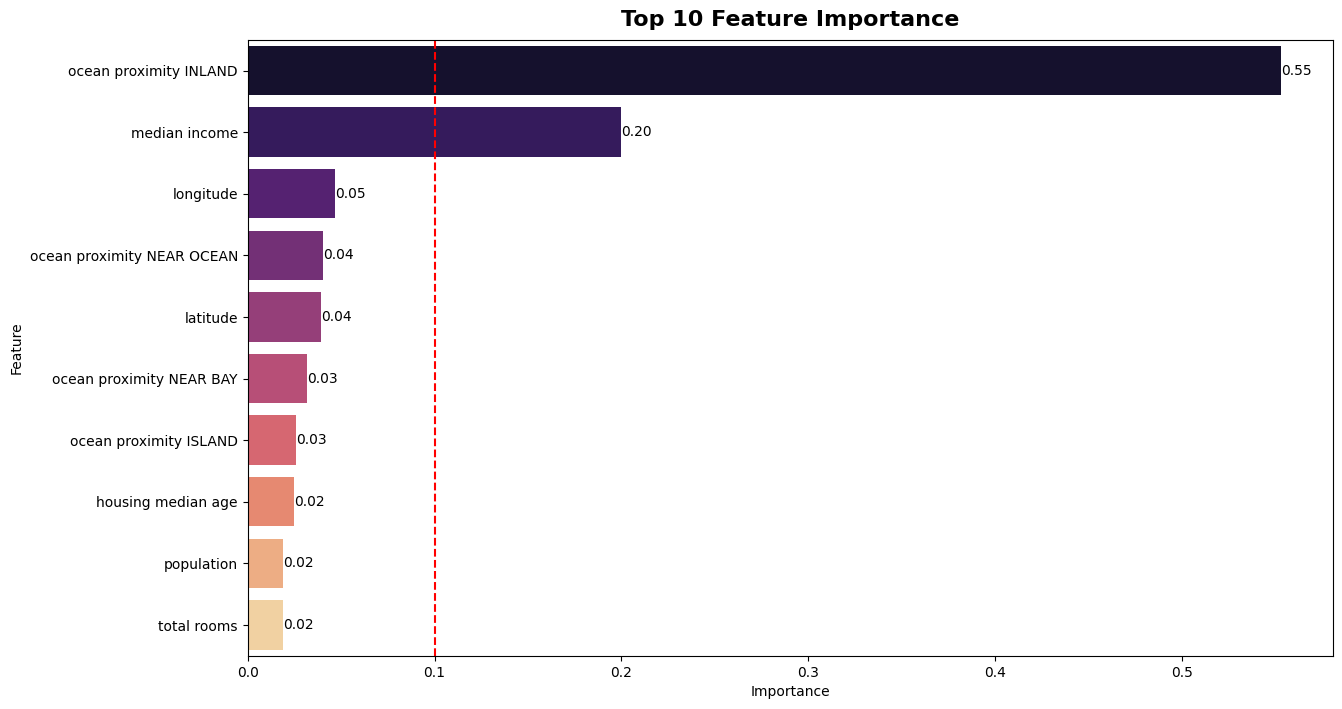

In [345]:
# Remove prefixes from the 'Feature' column
feature_impx['Feature'] = feature_impx['Feature'].str.replace('Binary__', '').str.replace('One Hot__', '').str.replace('Robust__', '')

# Check the data type of the 'Importance' column
print(feature_impx['Importance'].dtype)

# Convert 'Importance' column to numeric
feature_impx['Importance'] = pd.to_numeric(feature_impx['Importance'], errors='coerce')

# Calculate mean importance
mean_imp = feature_impx['Importance'].mean()

# Set a custom color palette
custom_palette = sns.color_palette("magma", n_colors=len(feature_impx))

# Increase the figure size
plt.figure(figsize=(14, 8))

# Create a bar plot with custom colors
bar_plot = sns.barplot(data=feature_impx, x='Importance', y='Feature', hue='Feature', palette=custom_palette)

# Add annotations
for index, value in enumerate(feature_impx['Importance']):
    bar_plot.text(value, index, f'{value:.2f}', ha='left', va='center', fontsize=10, color='black')

# Add title
plt.title('Top 10 Feature Importance', fontsize=16, fontweight='bold', pad=10)

# Plot mean importance
plt.axvline(x=mean_imp, color='red', linestyle='--', label='Mean Importance')

# Show the plot
plt.show()

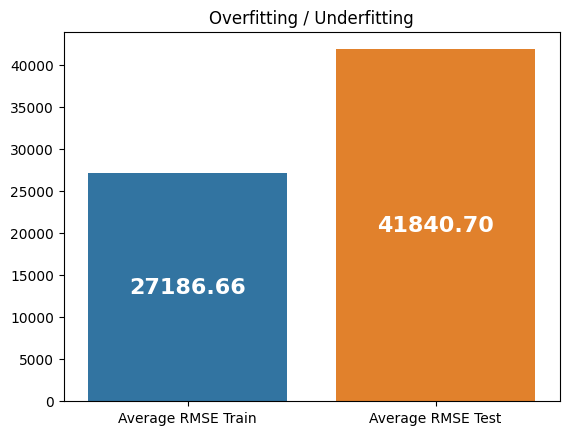

In [346]:
# Prediksi pada data pelatihan dan data uji (test)
y_train_pred = xgb_tuning.predict(X_train)
y_test_pred = xgb_tuning.predict(X_test)

# Hitung RMSE, MAE, dan MAPE
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

# Hitung rata-rata RMSE train dan RMSE test
avg_rmse_train = rmse_train.mean()
avg_rmse_test = rmse_test.mean()

# Membuat DataFrame
df_avg_rmse = pd.DataFrame({
    'Average RMSE Train': [avg_rmse_train],
    'Average RMSE Test': [avg_rmse_test],
})

# Membuat barplot
ax = sns.barplot(data=df_avg_rmse)

plt.title("Overfitting / Underfitting")

# Menambahkan anotasi pada barplot
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height() / 2), ha='center', va='center',
                            fontsize=16, color='white',fontweight='bold')

plt.show()

## **Conclusion**

Based on the evaluation metric scores on test data with a total of 2712 observations (number of X_test) and a range of number of bicycles (y_test) from $0-500,000 USD, the following conclusions can be drawn:

- **RMSE (Root Mean Squared Error):**

The RMSE score of 41840.699026 indicates that the average bicycle prediction error is approximately **<u>±$41,840 USD</u>**. RMSE provides a view of the overall error rate and can provide an idea of the extent to which predictions are reliable on an absolute scale.

- **MAE (Mean Absolute Error):**

The MAE score of 28642.197019 indicates that the average bicycle prediction error is approximately **<u>±$28,682 USD</u>**. MAE provides a direct picture of how close the predictions are to the actual data without taking into account the direction of error.

- **MAPE (Mean Absolute Percentage Error):**

The MAPE score of 0.1763 in this scenario indicates that the average relative error in bicycle predictions is approximately **<u>±17.63%</u>**. MAPE provides a perspective of relative error on a percentage scale, which can help understand the extent to which predictions are reliable.

The high RMSE and MAE values indicate that the model tends to have high inaccuracy in its predictions. This indicates that although the model provides an estimate of the number of bicycles borrowed, the level of uncertainty and error is still quite high. Therefore, this model is not yet optimal to be able to make a significant contribution in helping California Housing Price to accurately predict the total number of median housing price based on factors such as location, median salary, latitude and longitude and age of the building.

The best parameters based on tuning in this model are

**'model__gamma': 1,**

**'model__learning_rate': 0.2,**

**'model__max_depth': 5,**

**'model__n_estimators': 200**

The features that most influence the XGBoost model in learning data are the ocean_proximity_INLAND, median_income, longitude, ocean_proximity_NEAR_OCEAN, and latitude features.

## **Recommendation**

Recommendations to improve model performance:

- Conduct deeper research into the data on the features that influence the model in studying the data, namely location, median salary, latitude and longitude and age of the building
- Try using ensemble models such as Voting Regressor and Stack Regressor
- Add data in the upper price range of $300,000 - 500,000 USD, so that it balances with the lower data <$300,000 USD

___

## **Save Model**

In [347]:
import pickle

In [348]:
# best model
xgb_tuning = grid_xgb_3.best_estimator_
xgb_tuning

# fit
xgb_tuning.fit(X, y)

# save with pickle
pickle.dump(xgb_tuning, open('model_xgboost.sav', 'wb'))

In [350]:
# load model

model_loaded = pickle.load(open('model_xgboost.sav', 'rb'))
model_loaded

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehot',
                                                  OneHotEncoder(drop='first'),
                                                  ['ocean_proximity']),
                                                 ('robust', RobustScaler(),
                                                  ['latitude', 'longitude',
                                                   'housing_median_age',
                                                   'total_rooms', 'population',
                                                   'median_income'])])),
                ('model',
                 XGBRegressor(base_score=None, booster=None, callbacks=None,
                              colsample_bylevel=...
                              feature_types=None, gamma=1, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=0.2,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=5, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=200, n_jobs=None,
                              num_parallel_tree=None, random_state=42, ...))])